In [1]:
# General tools
import os
import datetime

#For data Handling
import pandas as pd
import numpy as np

#For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
%matplotlib inline

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Progreebar
from tqdm import tqdm

# For transformations and predictions
'''
from scipy.optimize import curve_fit
from yellowbrick.target import FeatureCorrelation
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import xgboostclassifier,XGBregressor

# For scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score,mean_absolute_error

# For validation
from sklearn.model_selection import train_test_split
'''

'\nfrom scipy.optimize import curve_fit\nfrom yellowbrick.target import FeatureCorrelation\nfrom sklearn.preprocessing import FunctionTransformer\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.cluster import KMeans \nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.tree import DecisionTreeRegressor\nfrom xgboost import xgboostclassifier,XGBregressor\n\n# For scoring\nfrom sklearn.metrics import mean_squared_error as mse\nfrom sklearn.metrics import r2_score,mean_absolute_error\n\n# For validation\nfrom sklearn.model_selection import train_test_split\n'

In [297]:
df_af = pd.read_csv('/Users/prabalsingh/Downloads/acousticFeatures_new.csv')
df_songmd = pd.read_csv('/Users/prabalsingh/Downloads/songs_new.csv')

In [298]:
df = pd.concat([df_af,df_songmd],join='inner',axis=1)

In [299]:
df.drop(columns=df.columns[[11,13,14,15,17]],inplace=True)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      2159 non-null   float64
 1   energy            2159 non-null   float64
 2   skey              2159 non-null   int64  
 3   loudness          2159 non-null   float64
 4   smode             2159 non-null   int64  
 5   speechiness       2159 non-null   float64
 6   acousticness      2159 non-null   float64
 7   instrumentalness  2159 non-null   float64
 8   liveness          2159 non-null   float64
 9   valence           2159 non-null   float64
 10  tempo             2159 non-null   float64
 11  songId            2159 non-null   object 
 12  popularity        2159 non-null   int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 219.4+ KB


In [301]:
df

danceability  energy  skey  loudness  smode  speechiness  acousticness  \
0            0.557  0.8920     8    -3.828      1       0.4190        0.1200   
1            0.666  0.0742     5   -25.180      1       0.7260        0.7800   
2            0.525  0.0162     8   -28.493      1       0.0367        0.9940   
3            0.363  0.7660     0    -4.088      1       0.0568        0.6880   
4            0.514  0.4080     0    -9.613      1       0.0286        0.5580   
...            ...     ...   ...       ...    ...          ...           ...   
2154         0.639  0.3400     0   -12.185      0       0.0604        0.3190   
2155         0.735  0.7090     5   -12.838      1       0.1330        0.4940   
2156         0.837  0.8470     4    -4.395      1       0.0982        0.3180   
2157         0.693  0.7520     0    -8.260      1       0.0496        0.0262   
2158         0.702  0.3250     1   -10.289      1       0.3680        0.1020   

      instrumentalness  liveness  valence    tempo                  songId  \
0              0.00000     0.238    0.279  160.123  00hqF3eHrXXgQDXeSrz2Ro   
1              0.00000     0.413    0.359  102.743  00mNIJ6whGQeHnghiplpi3   
2              0.41600     0.098    0.339  127.756  00POiKOJEujIplponPMg9O   
3              0.00000     0.122    0.747  184.904  00vIUyr4zclAzrJsMWvhh4   
4              0.00000     0.125    0.225  139.981  015dQ9RfL3ibkgvyzgyfK0   
...                ...       ...      ...      ...                     ...   
2154           0.00000     0.169    0.333  115.034  7xtsuU7WlDNmTzUQ32oQ7r   
2155           0.60600     0.697    0.875  113.877  7yO5KhFHmuHhssqdLxeWnm   
2156           0.00000     0.261    0.730   90.996  7zjxmI7AldHmhWfFozqv3t   
2157           0.00016     0.201    0.833  144.706  7zWE4XT8ATao3xxdHtKly4   
2158           0.00001     0.111    0.301  154.006  7zZD7WGGyoWlKvDBUMKUul   

      popularity  
0             67  
1             67  
2             60  
3             85  
4             93  
...          ...  
2154           6  
2155           6  
2156          12  
2157          12  
2158          12  

[2159 rows x 13 columns]

<AxesSubplot:xlabel='popularity', ylabel='Density'>

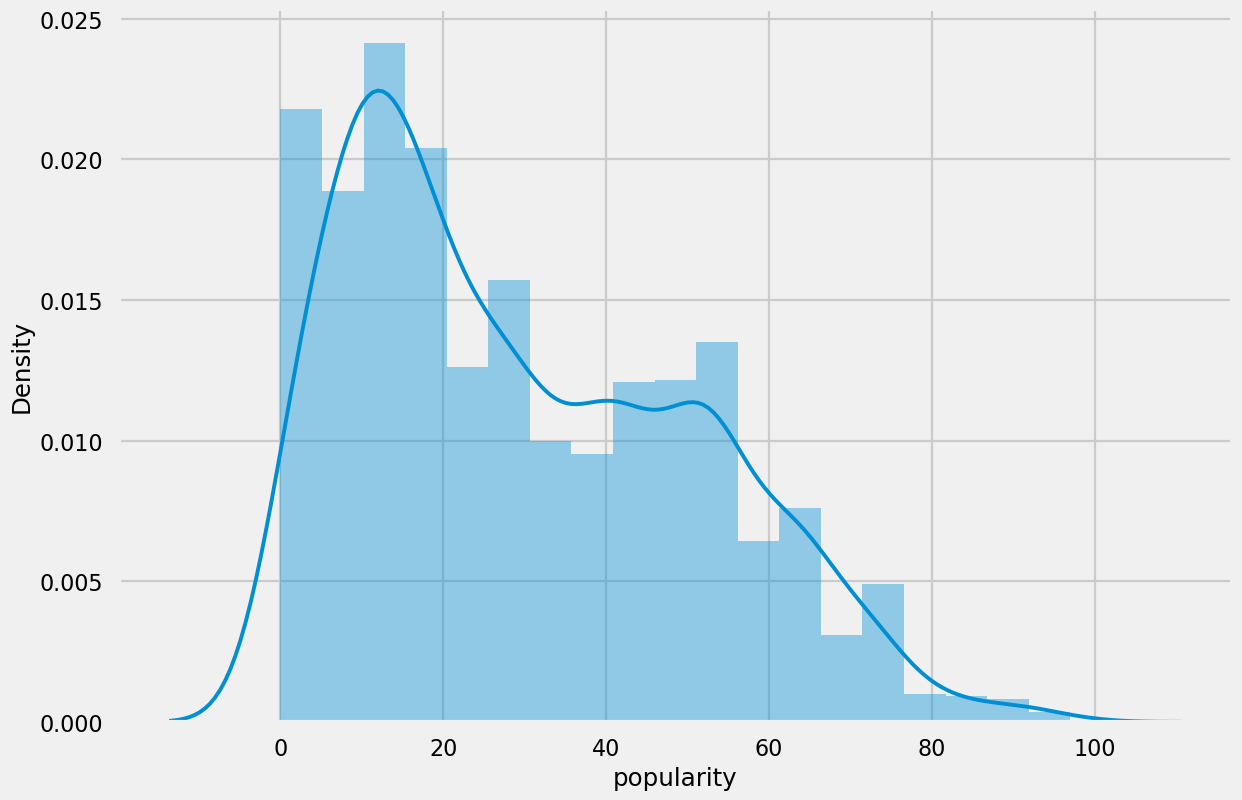

In [302]:
sns.distplot(df['popularity'])

In [303]:
df['popularity groups'] = pd.qcut(df['popularity'],q=10)

<AxesSubplot:xlabel='count', ylabel='popularity groups'>

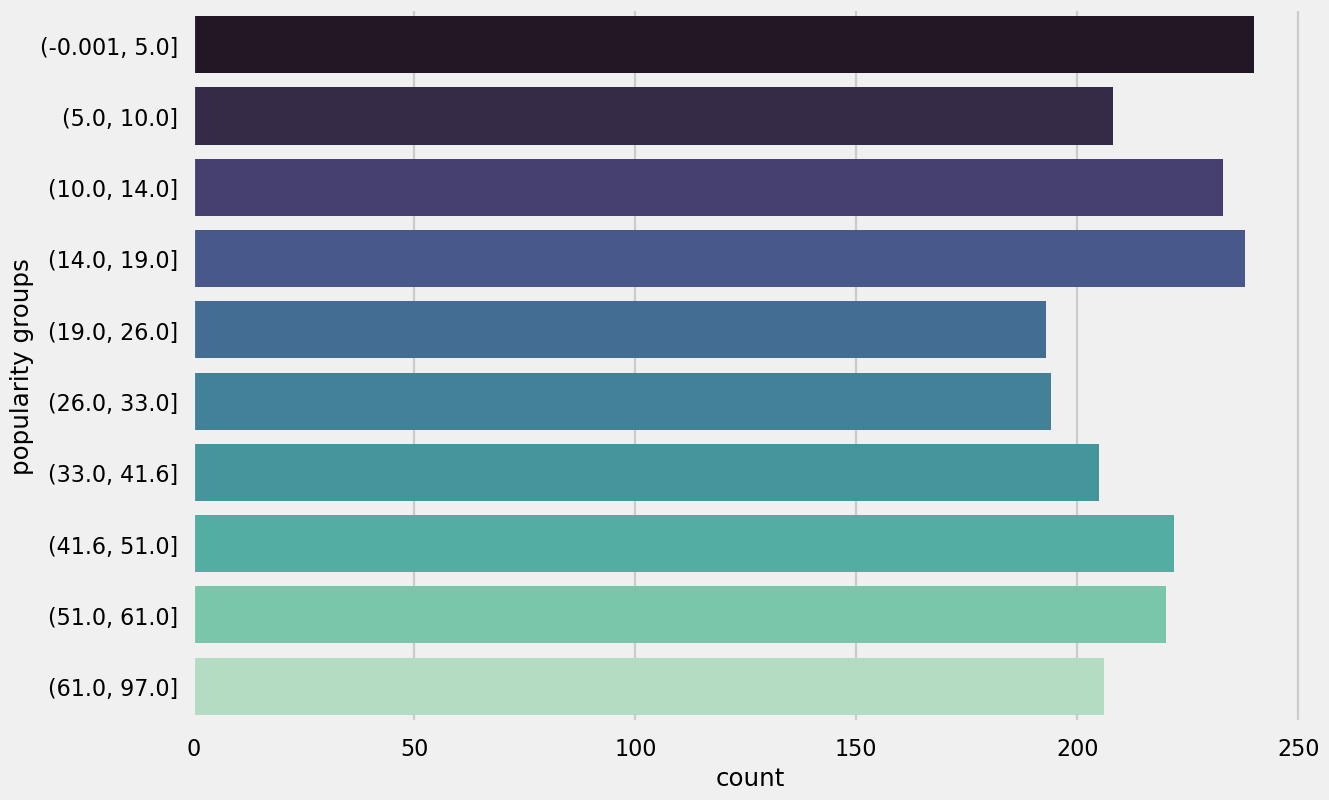

In [304]:
plt.style.use('seaborn-poster')
sns.countplot(y=df['popularity groups'],palette='mako')

<AxesSubplot:xlabel='count', ylabel='popularity groups'>

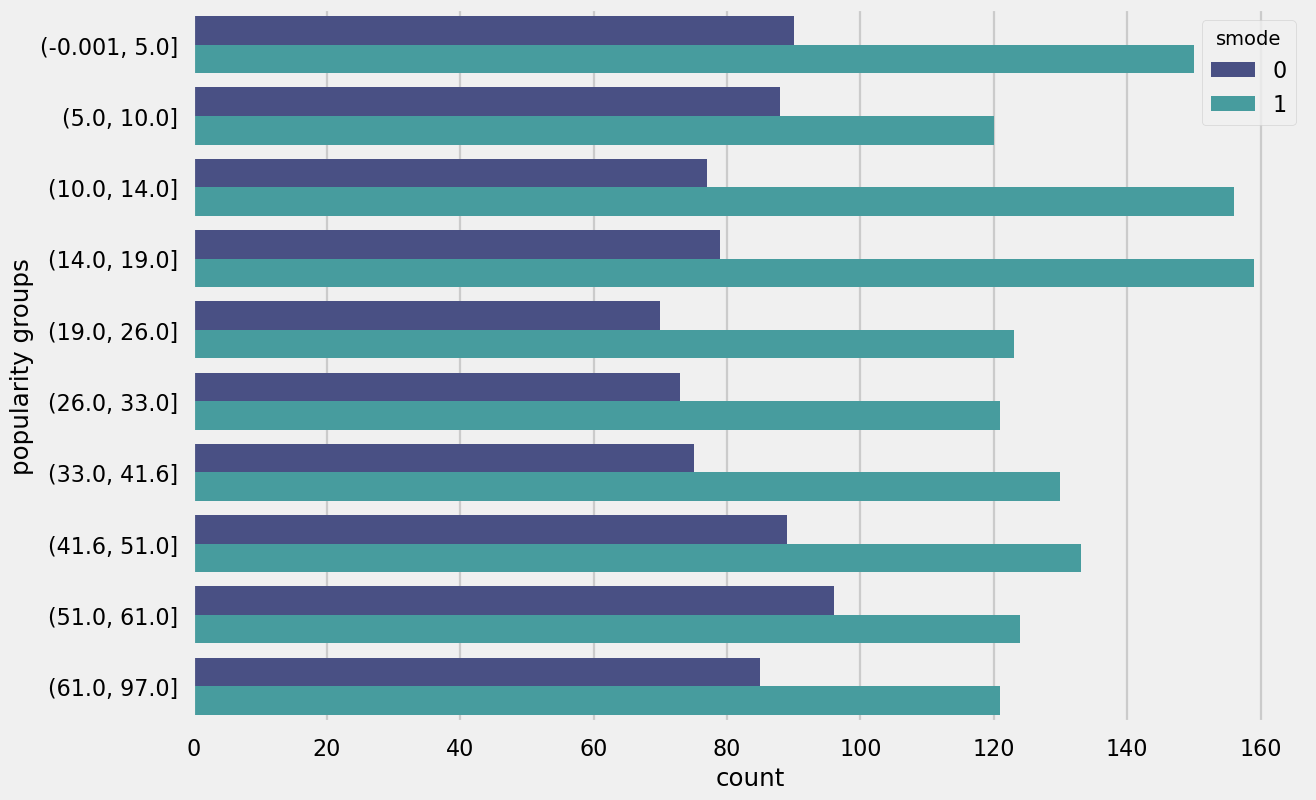

In [305]:
sns.countplot(y=df['popularity groups'],palette='mako',hue=df['smode'])

In [306]:
df['skey'].value_counts()

0     239
9     237
7     224
11    204
2     200
1     188
4     184
5     183
6     162
8     148
10    139
3      51
Name: skey, dtype: int64

In [307]:
df[df['instrumentalness']!=0].corr()['instrumentalness'].sort_values()

loudness           -0.317749
valence            -0.260688
danceability       -0.251223
energy             -0.135472
speechiness        -0.113249
tempo              -0.050879
popularity         -0.027935
smode               0.018628
skey                0.028957
liveness            0.097192
acousticness        0.099995
instrumentalness    1.000000
Name: instrumentalness, dtype: float64

In [143]:
df_instru = df[df['instrumentalness']!=0][['loudness','danceability','valence','energy','speechiness','liveness','acousticness','instrumentalness']]

In [144]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train,X_test,y_train,y_test = train_test_split(df_instru.iloc[:,0:-1],df_instru.iloc[:,-1],test_size=0.2,random_state=42)

In [147]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((476, 7), (119, 7), (476,), (119,))

In [148]:
rfreg_for_instru = RandomForestRegressor(n_estimators=500,min_samples_leaf=5,max_samples=0.8,max_features=7,n_jobs=-1)

In [105]:
rfreg_for_instru.fit(X_train,y_train)

RandomForestRegressor(max_features=7, max_samples=0.8, min_samples_leaf=5,
                      n_estimators=500, n_jobs=-1)

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(y_test,rfreg_for_instru.predict(X_test))

-0.012405592000434895

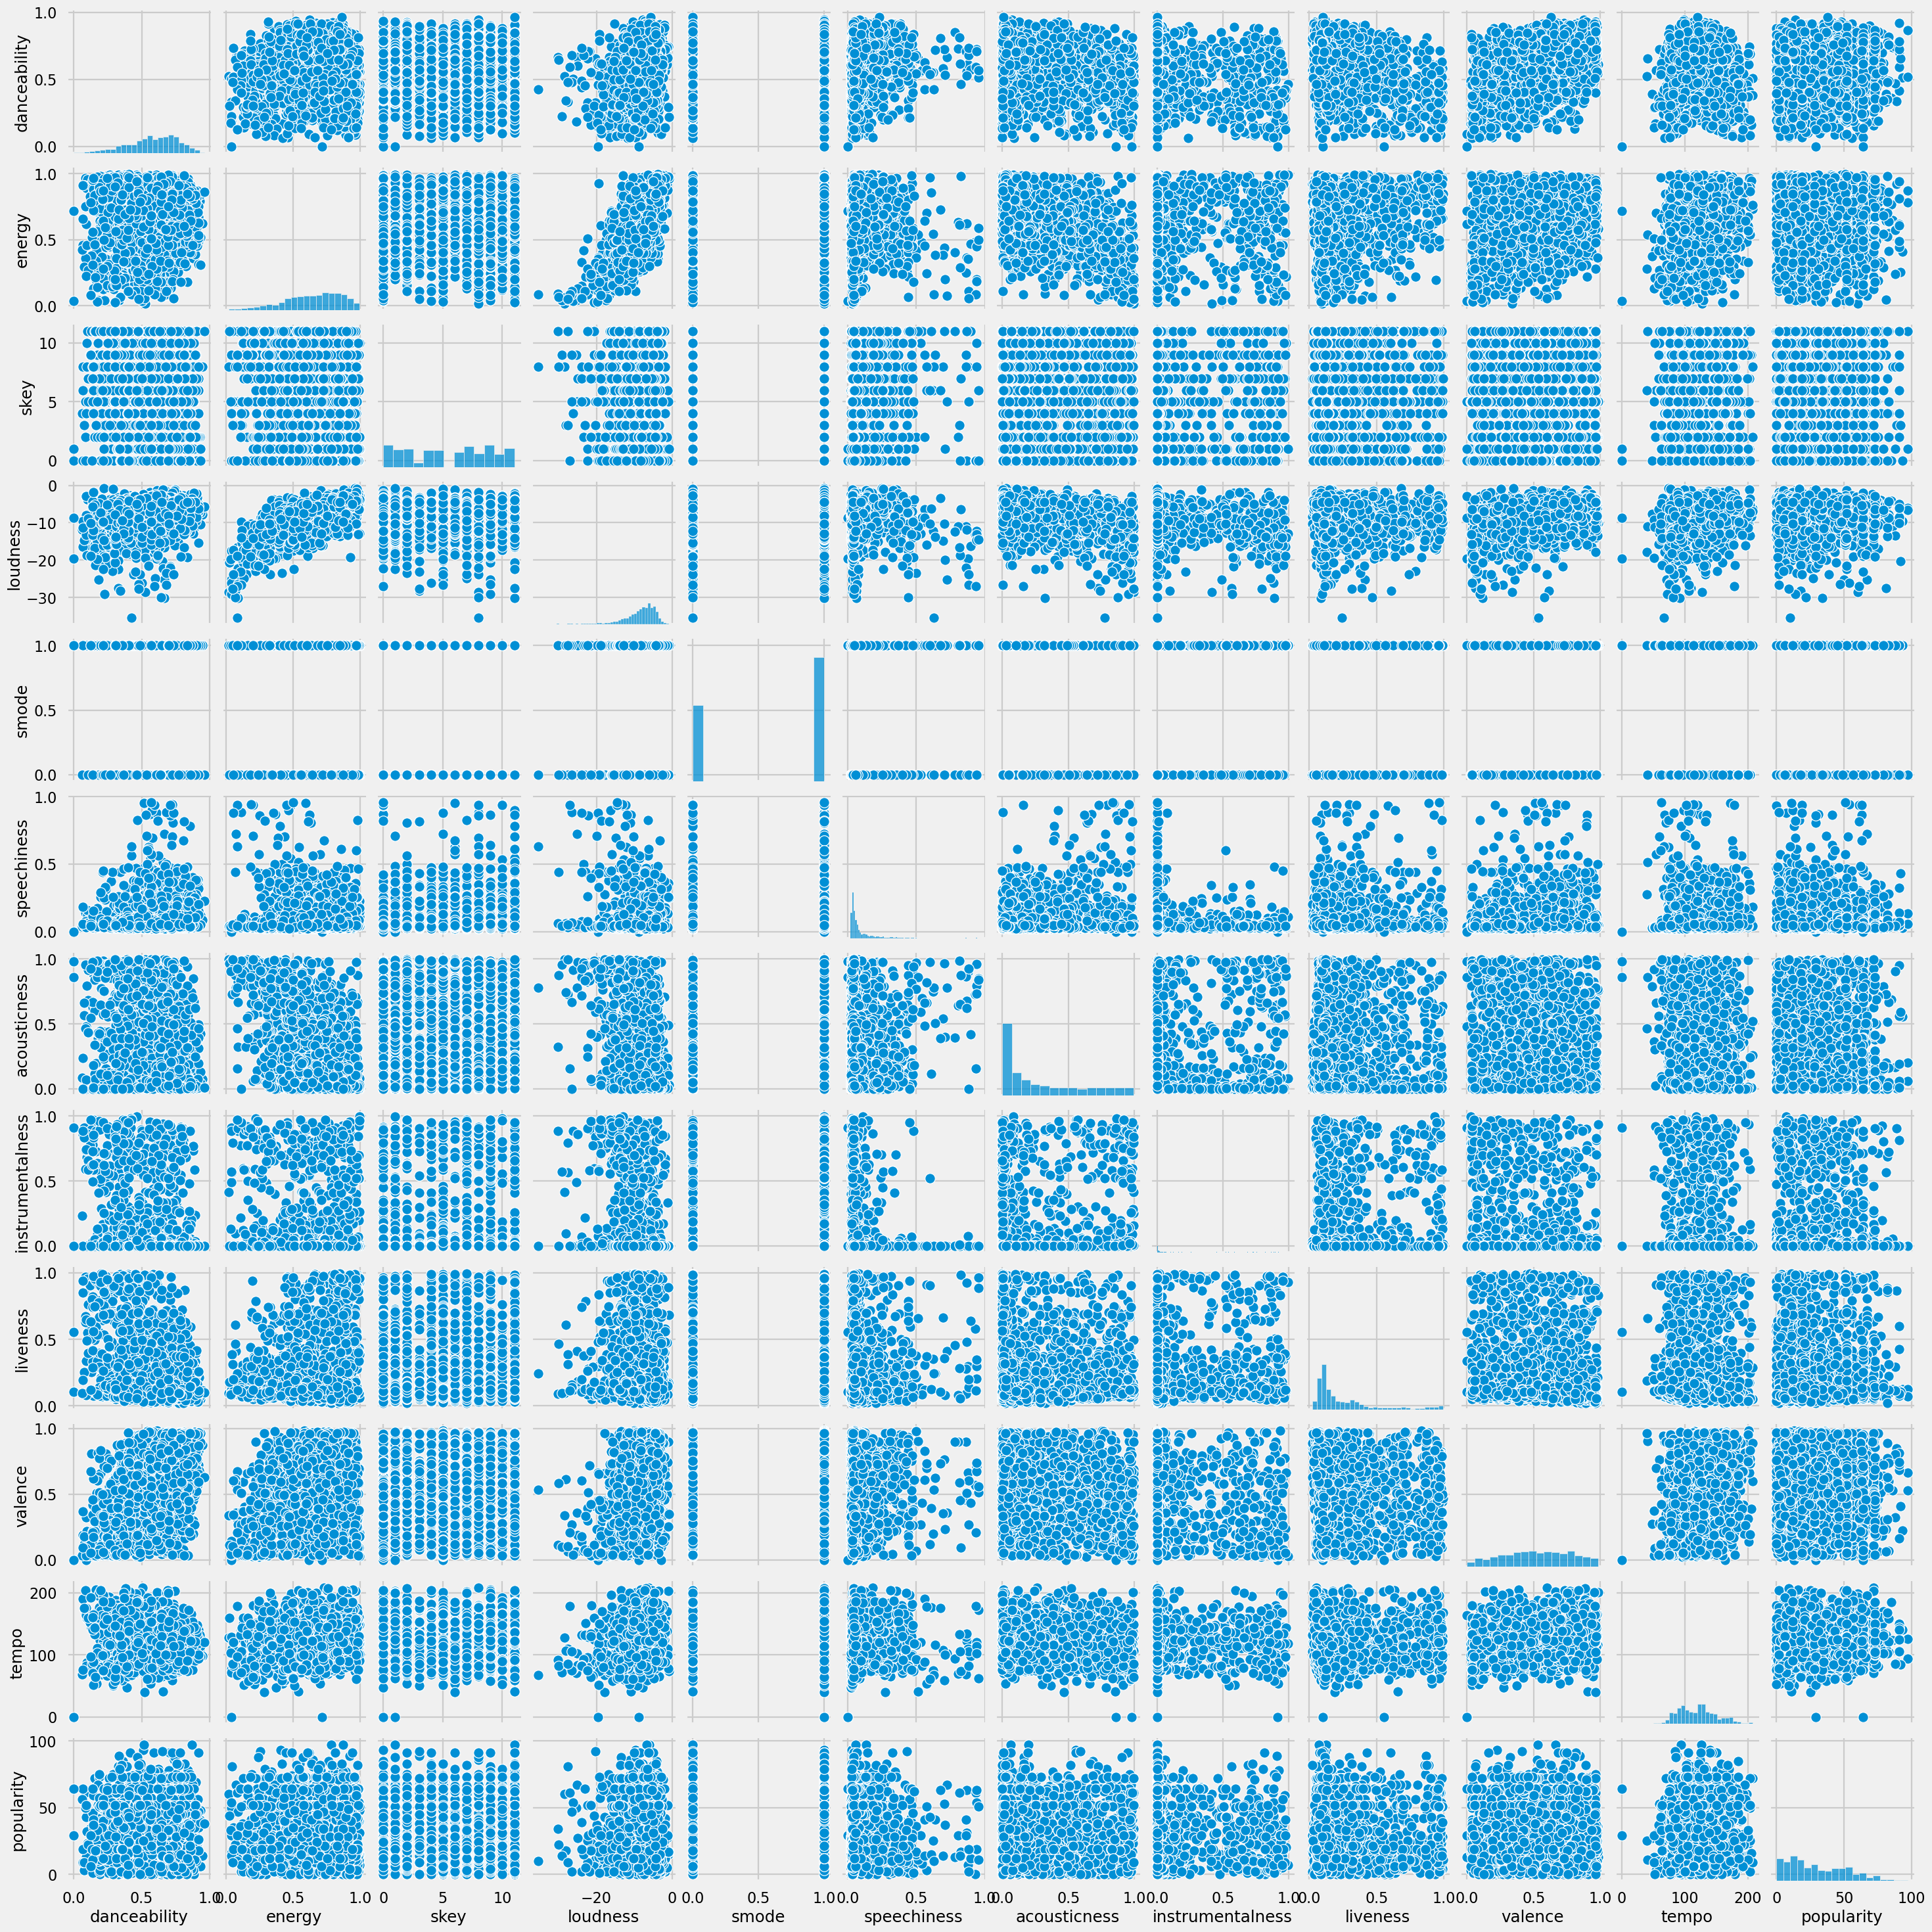

In [308]:
sns.pairplot(df)

In [328]:
def change_instrumentalness(instrumentallness):
    if instrumentallness == 0:
        return df_instru['instrumentalness'].median()
    else:
        return instrumentallness
    
df['instrumentalness'].apply(change_instrumentalness)

0       0.00248
1       0.00248
2       0.41600
3       0.00248
4       0.00248
         ...   
2154    0.00248
2155    0.60600
2156    0.00248
2157    0.00016
2158    0.00001
Name: instrumentalness, Length: 2159, dtype: float64

In [150]:
def change_tempo(tempo):
    if tempo==0:
        return df[df['tempo']!=0].median()
    else:
        return tempo
    
df['tempo'].apply(change_tempo)

0      127.756
1      184.904
2       87.763
3       80.875
4       93.643
        ...   
969     89.979
970    150.007
971    125.045
972    129.882
973    115.034
Name: tempo, Length: 974, dtype: object

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,KBinsDiscretizer,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pickle


In [156]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,KBinsDiscretizer,OneHotEncoder

In [157]:
PoplBins = KBinsDiscretizer(n_bins=10,encode='ordinal')
ColTnf = ColumnTransformer(transformers=[('tnf1',PoplBins,['popularity']),
                    ('tnf2',MinMaxScaler(),['loudness','tempo']),
                ('tnf3',OneHotEncoder(sparse=False,drop='first'),['skey','smode'])]
                           ,remainder='passthrough')

In [160]:
df.drop(columns=['popularity groups'],inplace=True)

In [162]:
df = ColTnf.fit_transform(df)

In [165]:
from sklearn.metrics.pairwise import cosine_similarity

In [185]:
similarity = cosine_similarity(df[:,:-1])

In [248]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(101, 0.9958351906494073),
 (224, 0.9940058898124599),
 (337, 0.993993502520602),
 (338, 0.993900505209106),
 (131, 0.9912024204649817)]

In [212]:
index_songId_dict = dict(enumerate(df[:,-1]))
songId_index_dict = dict([(value,key) for key,value in index_songId_dict.items()])                    

In [239]:
def Search_SongId_for_index(ListOfSongIdsIndex):
    temp = []
    for i in ListOfSongIdsIndex:
        temp.append(index_songId_dict[i])
    return temp

In [216]:
def Search_index_for_SongId(song_id):
    song_index = songId_index_dict[song_id]
    return song_index

In [237]:
def ListOfSongIds(Top_k_song_similarity_list):
    temp = []
    for i in Top_k_song_similarity_list:
        temp.append(i[0])
    return temp

In [243]:
def RecommenderEngine(song_id):
    index = Search_index_for_SongId(song_id)
    similar_songs_indexes_list = sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])[1:6]
    SongId_index_list = ListOfSongIds(similar_songs_indexes_list)
    Results_SongId = Search_SongId_for_index(SongId_index_list)
    return Results_SongId

In [245]:
RecommenderEngine('07qmdONf1EOWUdASo0OxDq')

['55CBOTq3FqvsT4BK2pt6vI',
 '7iwJOi3hlMqZt6pj1sQOBj',
 '6LDuXl5Mk732E0AiCk43RC',
 '5kRjAJ0KTbDlZB88pFuufx',
 '3rexmM7nq0MG34Cr9WlLkG']

In [246]:
import pickle

In [250]:
similarity.shape

(974, 974)

In [24]:
class Preprocessing:
    
    def __init__(self,AcousticFeaturesFilepath,SongsMetadataFilepath):
        self.AcousticFeaturesDF = pd.read_csv(AcousticFeaturesFilepath)
        self.SongsMetadataDF = pd.read_csv(SongsMetadataFilepath)
        self.FinalDF = pd.concat([self.AcousticFeaturesDF,self.SongsMetadataDF],join='inner',axis=1)
        self.FinalDF.drop(columns=self.FinalDF.columns[[11,13,14,15,17]],inplace=True)
    
    def clean_feature(self,feature,feature_cell):
        if feature_cell == 0:
            return self.FinalDF[self.FinalDF[feature]!=0].median()['instrumentalness']
        else:
            return feature_cell
        
    def clean_features(self,ListofFeatures):
        for feature in ListofFeatures:
            self.FinalDF[feature].apply(lambda x: self.clean_feature(feature,x))

            
    def column_transformation(self,bins):
        PoplBins = KBinsDiscretizer(n_bins=bins,encode='ordinal')
        ColTnf = ColumnTransformer(transformers=[('tnf1',PoplBins,['popularity']),
                    ('tnf2',MinMaxScaler(),['loudness','tempo']),
                ('tnf3',OneHotEncoder(sparse=False,drop='first'),['skey','smode'])]
                           ,remainder='passthrough')
        df = ColTnf.fit_transform(self.FinalDF)
        return df
    
    
        
class RecommendationSystem(Preprocessing):
    
    def __init__(self,AcousticFeaturesFilepath,SongsMetadataFilepath):
        super().__init__(AcousticFeaturesFilepath,SongsMetadataFilepath)
        super().clean_features(['instrumentalness'])
        self.df = super().column_transformation(bins=10)
        self.similarity = cosine_similarity(self.df[:,:-1])
        self.index_songId_dict = dict(enumerate(self.df[:,-1]))
        self.songId_index_dict = dict([(value,key) for key,value in self.index_songId_dict.items()])
        #print(similarity)
    
    def Search_SongId_for_index(self,ListOfSongIdsIndex):
        temp = []
        for i in ListOfSongIdsIndex:
            temp.append(self.index_songId_dict[i])
        return temp
    
    def Search_index_for_SongId(self,song_id):
        song_index = self.songId_index_dict[song_id]
        return song_index
    
    @staticmethod
    def ListOfSongIds(Top_k_song_similarity_list):
        temp = []
        for i in Top_k_song_similarity_list:
            temp.append(i[0])
        return temp
    
    def RecommenderEngine(self,song_id,n_recommendations):
        index = self.Search_index_for_SongId(song_id)
        similar_songs_indexes_list = sorted(list(enumerate(self.similarity[index])),reverse=True,key=lambda x:x[1])[1:n_recommendations+1]
        SongId_index_list = RecommendationSystem.ListOfSongIds(similar_songs_indexes_list)
        Results_SongId = self.Search_SongId_for_index(SongId_index_list)
        return Results_SongId

In [27]:
HopeSpotify = RecommendationSystem('/home/anuj/Desktop/programs/assignments/bdt/testing/acousticFeatures.csv',
                                   '/home/anuj/Desktop/programs/assignments/bdt/testing/songs.csv')

In [29]:
HopeSpotify.RecommenderEngine(song_id='00vIUyr4zclAzrJsMWvhh4',n_recommendations=10)

['0nyoWShAte3aZy0Qv2y0j7',
 '6WOsXP6xYpm6KI1oHGiFo0',
 '7A9wE6Fv7EOtNsdc15n14a',
 '0QQSR0relCdVhTMpfhWHNZ',
 '5FMXyrbnff4ChCgnz49mf4',
 '1HtxUKTUkpIu1agRtI3HPQ',
 '4UMIv5jd9gK98a39BQRD9X',
 '0F4hWN6CAbSJTI1St5d2l9',
 '6RB5dJu1tZuajCtJ9lxo7D',
 '0TOW8bu1pkcvT9H8qCdRJO']

In [32]:
PickleFileObj = open('HopeSpotifyPickleFile','wb')
pickle.dump(HopeSpotify,PickleFileObj)
PickleFileObj.close()

In [33]:
loadedmodel = pickle.load(open('HopeSpotifyPickleFile', 'rb'))

In [41]:
loadedmodel.RecommenderEngine('2CORoIId0A9UrEIft3nExk',3)

['5WjW14T7Y3NCAaW0GQaQvl', '410NHwz8mMvM0AYxKJooy3', '745T968WFovSRIAPbtpcuN']

In [385]:
type(HopeSpotify)

<class '__main__.RecommendationSystem'>


In [382]:
loadedmodel

In [371]:
songId_index_dict

{'00POiKOJEujIplponPMg9O': 0,
 '00vIUyr4zclAzrJsMWvhh4': 1,
 '01McbeMnXQvs1MbXkuu9dF': 2,
 '02Cc1YV8vBuZ1b030phVFx': 3,
 '02x39VAcaRNMIDuVgaXdWB': 4,
 '02zLhpWokJghrfZrwV2z8a': 5,
 '032RzsBfviepd1egcRtQib': 6,
 '04WxFTgT3bEvX1WOYzT5Ky': 7,
 '05zONSMcbDDcLPg8Ap2DJM': 8,
 '07qmdONf1EOWUdASo0OxDq': 9,
 '07rRawvOhHOMIqnACXTkYu': 10,
 '07TcZtBefAMMC05jS1whTE': 11,
 '07X7p4jFhHEECps5IBKQ3c': 12,
 '089l1MVyIds11KYiNo6IOJ': 13,
 '08Isz2ETWSBhvIl8UpKYsp': 14,
 '08rQ80583Alesr2BMMAVfQ': 15,
 '08TCIO6LpgC11UdayeOxWB': 16,
 '08vAi1GTqDnfmgjz9eEgya': 17,
 '0aCaaMPm61Vb7AhxIobGld': 18,
 '0aOJ0w7G8ceN4cynfhbF3v': 19,
 '0AOKB2fheEM3qAqPDHnbYi': 20,
 '0apYmTMyg7tZxTSPIjQLeS': 21,
 '0aYlfWZNZMyL95VnaYTjtk': 22,
 '0bCmCQfqr7UepZbbIxIbCH': 23,
 '0BmMHpQL6KyqclnNvK97Rl': 24,
 '0ckILmtBH2r5UFOtTf2cN0': 25,
 '0d7WbF9b6Rre1WxwQ1qjyr': 26,
 '0dEIca2nhcxDUV8C5QkPYb': 27,
 '0dlP9SnqQa5k1A9mReybFb': 28,
 '0DPIdE8QMOwTntMixtWnsB': 29,
 '0DPlBDc2ZICPMTm82eNTMN': 30,
 '0EeJJbV7F7rxmBwU55Z0L5': 31,
 '0Ej5ITvVs4Fb7mTv

In [30]:
!pip install flask

In [ ]:
import numpy as np
from flask import Flask, request, jsonify
from werkzeug.wrappers import Request, Response

app = Flask('_name_')
model = pickle.load(open('HopeSpotifyPickleFile','rb'))

@app.route('/')
def prabal():
    return "working"

@app.route('/api',methods=['POST'])
def predict():
    data = request.get_json()

    prediction=model.RecommenderEngine(data["song_id"],3)
    output = prediction
    print(output)
    
    return jsonify(output)


if __name__ == '__main__':
    from werkzeug.serving import run_simple
    run_simple('localhost', 9000, app)

 * Running on http://localhost:9000/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Nov/2022 01:53:32] "POST /api HTTP/1.1" 200 -


['5WjW14T7Y3NCAaW0GQaQvl', '410NHwz8mMvM0AYxKJooy3', '745T968WFovSRIAPbtpcuN']


127.0.0.1 - - [16/Nov/2022 04:19:26] "GET / HTTP/1.1" 200 -
